In [59]:
import numpy as np
import pandas as pd

data_main = pd.read_excel('labelled Copy of Output.xlsx')

In [60]:
#importing TensorFlow and tf.keras
import tensorflow as tf
from sklearn.model_selection import train_test_split as split

In [61]:
data_main

,timestamp,state,Ax,Ay,Az,Gx,Gy,Gz,Class
0,0:00:00,0,0.873291,0.211182,-0.437866,2.408537,8.628049,-8.353659,none
1,0:00:02,0,0.872314,0.210815,-0.406250,2.896341,8.932927,-8.475610,none
2,0:00:02,0,0.872314,0.210205,-0.405273,3.567073,8.810976,-8.292683,none
3,0:00:02,0,0.873291,0.210449,-0.438232,-3.658537,8.810976,-8.170732,none
4,0:00:02,0,0.872559,0.210815,-0.438477,-3.109756,9.115854,-7.987805,none
...,...,...,...,...,...,...,...,...,...
107848,19:53:12,0,-0.936768,-0.288818,-0.092285,-8.810976,2.164634,-10.274390,none
107849,19:53:12,0,-0.937012,-0.288086,-0.092163,-4.085366,2.743902,-11.524390,none
107850,19:53:12,0,-0.971436,-0.286499,-0.091919,-17.042683,2.987805,-5.304878,none
107851,19:53:12,0,-0.972290,-0.286255,-0.090210,-14.481707,2.713415,-5.518293,none


In [62]:
labels = data_main['Class']
features = data_main.drop(columns=['state', 'Class', 'timestamp'])

In [63]:
labels

0         none
1         none
2         none
3         none
4         none
          ... 
107848    none
107849    none
107850    none
107851    none
107852    none
Name: Class, Length: 107853, dtype: object

In [64]:
classes = ['none', 'happy', 'frown']

for i in range (len(labels)):
    print(labels[i])
    labels[i] = classes.index(labels[i])


none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
happy
none
none
non

/tmp/ipykernel_18129/3187257629.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[i] = classes.index(labels[i])


none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none


In [65]:
features

,Ax,Ay,Az,Gx,Gy,Gz
0,0.873291,0.211182,-0.437866,2.408537,8.628049,-8.353659
1,0.872314,0.210815,-0.406250,2.896341,8.932927,-8.475610
2,0.872314,0.210205,-0.405273,3.567073,8.810976,-8.292683
3,0.873291,0.210449,-0.438232,-3.658537,8.810976,-8.170732
4,0.872559,0.210815,-0.438477,-3.109756,9.115854,-7.987805
...,...,...,...,...,...,...
107848,-0.936768,-0.288818,-0.092285,-8.810976,2.164634,-10.274390
107849,-0.937012,-0.288086,-0.092163,-4.085366,2.743902,-11.524390
107850,-0.971436,-0.286499,-0.091919,-17.042683,2.987805,-5.304878
107851,-0.972290,-0.286255,-0.090210,-14.481707,2.713415,-5.518293


In [66]:
train_x, test_x, train_y, test_y = split(features, labels, train_size=0.7)

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = 6),
    tf.keras.layers.Dense(12, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'relu'),
    # tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(3),
])

In [68]:
train_x = tf.convert_to_tensor(train_x, dtype=tf.float32)
train_y = tf.convert_to_tensor(train_y, dtype=tf.int16)


In [69]:
train_x

<tf.Tensor: shape=(75497, 6), dtype=float32, numpy=
array([[-1.0012207e+00,  6.4697266e-03, -2.1142578e-01,  1.3750000e+01,
         1.5701220e+01, -3.2621951e+00],
       [ 7.4365234e-01,  3.6303711e-01, -5.2465820e-01,  4.6646342e+00,
        -9.3902435e+00, -5.3658538e+00],
       [ 5.2050781e-01,  7.5927734e-01, -4.2089844e-01, -8.7500000e+00,
        -2.1951220e+00,  6.0975611e-02],
       ...,
       [ 2.7258301e-01,  8.8940430e-01, -3.6657715e-01, -9.9085369e+00,
        -2.0426829e+00, -8.5060978e+00],
       [ 4.3786621e-01,  8.1323242e-01, -4.5104980e-01,  9.5731707e+00,
        -1.8597561e+00, -6.2195120e+00],
       [ 5.4370117e-01,  7.4755859e-01, -3.6315918e-01, -8.2012196e+00,
        -1.0365853e+00,  8.5365856e-01]], dtype=float32)>

In [70]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(train_x, train_y, epochs = 30)

probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

Epoch 1/30
2360/2360 [==============================] - 3s 1ms/step - loss: 0.6646 - accuracy: 0.8037
Epoch 2/30
2360/2360 [==============================] - 3s 1ms/step - loss: 0.5963 - accuracy: 0.8134
Epoch 3/30
2360/2360 [==============================] - 3s 1ms/step - loss: 0.5905 - accuracy: 0.8137
Epoch 4/30
2360/2360 [==============================] - 2s 1ms/step - loss: 0.5863 - accuracy: 0.8139
Epoch 5/30
2360/2360 [==============================] - 2s 904us/step - loss: 0.5845 - accuracy: 0.8139
Epoch 6/30
2360/2360 [==============================] - 2s 929us/step - loss: 0.5824 - accuracy: 0.8140
Epoch 7/30
2360/2360 [==============================] - 2s 895us/step - loss: 0.5794 - accuracy: 0.8139
Epoch 8/30
2360/2360 [==============================] - 2s 894us/step - loss: 0.5760 - accuracy: 0.8139
Epoch 9/30
2360/2360 [==============================] - 2s 901us/step - loss: 0.5729 - accuracy: 0.8139
Epoch 10/30
2360/2360 [==============================] - 2s 919us/step -

In [71]:
test_y = tf.convert_to_tensor(test_y, dtype=tf.int16)
test_x = tf.convert_to_tensor(test_x, dtype=tf.float32)


In [72]:
predictions = probability_model.predict(test_x)

1012/1012 [==============================] - 1s 670us/step


In [73]:
from sklearn.metrics import accuracy_score, f1_score

In [74]:
predictions

array([[0.15737957, 0.74480236, 0.09781805],
       [0.03185301, 0.8626583 , 0.10548859],
       [0.20660348, 0.7858194 , 0.00757716],
       ...,
       [0.22632867, 0.6644313 , 0.1092401 ],
       [0.06079418, 0.86427176, 0.07493409],
       [0.02654536, 0.9138853 , 0.05956934]], dtype=float32)

In [75]:
model.evaluate(test_x, test_y)

1012/1012 [==============================] - 1s 888us/step - loss: 0.5470 - accuracy: 0.8085


[0.546989381313324, 0.8084744811058044]

In [76]:

import numpy as np 
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

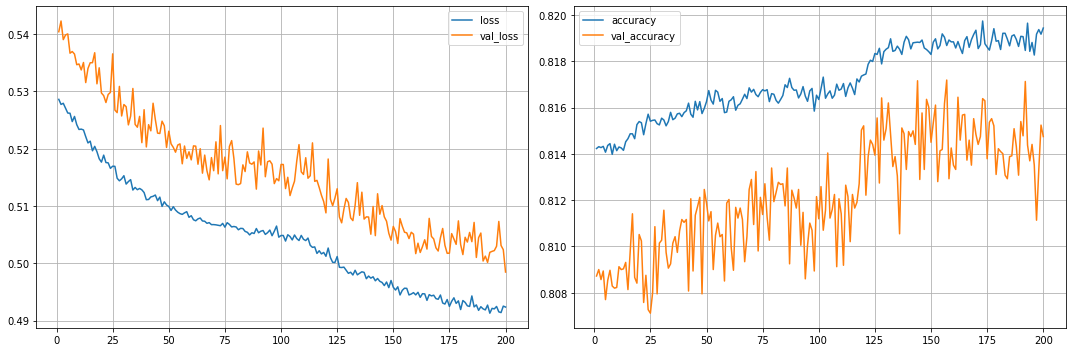

2360/2360 [==============================] - 3s 1ms/step - loss: 0.4924 - accuracy: 0.8194 - val_loss: 0.4985 - val_accuracy: 0.8147


In [77]:

callbacks_list = [PlotLearning()]

model.fit(train_x,
          train_y,
          epochs = 200,
        #   batch_size = batch_size,
          validation_data=(test_x, test_y),
          verbose=1,
          shuffle=True,
        #   class_weight=class_weight,
          callbacks=callbacks_list
          )